## Introduction to Regression Trees with Climbing Data

- Author: Izaan Khudadad
- Email : ikhudada@charlotte.edu
- Affiliation: University of North Carolina at Charlotte

Categories:

- Prediction
- Modeling
- Regression Trees 
- Exploratory Data Analysis 

## Introduction

In this activity, you will explore a dataset on indoor rock climbing attempts, compiled from climbers logging their performance on various climbing problems in a gym setting. The dataset includes information about the climber (such as weight and skill rating), the climb (grade difficulty and wall angle), and performance indicators (number of attempts, success or failure).

Each observation represents a single climb attempt made by an individual. This structure allows you to examine patterns in climbing success, effort, and difficulty, and to build predictive models based on climber characteristics and problem features.

By the end of the activity, you should be able to:

1. Use Python to create and interpret regression trees for predicting numeric outcomes.
2. Explore model performance using visualizations and decision paths.
3. Gain experience with libraries like scikit-learn, pandas, and matplotlib for modeling and evaluation.

### Data

The dataset contains observations from climbers attempting indoor climbing problems (routes). Each row represents one climbing attempt and includes both climber attributes and climb-specific information. The data can be used to understand factors affecting climbing success, effort, and performance.

[Climber Data](https://github.com/schuckers/Charlotte_SCORE_Summer25/blob/main/Data%20for%20Modules/Data%20for%20intro%20to%20regression%20tree/climber_df.csv)

<details>
<summary><b>Variable Descriptions</b></summary>

| Variable | Description |
|--------------------|-----------------------------------------------------------------------------|
| user_id             | Unique identifier for each climber |
| country             | Country of residence or origin of the climber                |
| sex             | Sex of the climber (M or F)            |
| weight          | Weight of the climber in kilograms   |
| height           | Height of the climber   |
| age              | Age of the climber in years |
| years_cl              | Number of years the climber has been climbing|
| date_first           | Date of the climber’s first recorded climb |
| date_last             | Date of the climber’s most recent recorded climb |
| grades_count          | Total number of climbs completed with a recorded grade |
| grades_first             | Difficulty grade of the first climb the user completed |
| grades_last             | Difficulty grade of the most recent climb completed  |
| grades_max            | Highest grade completed by the climber |
| grades_mean            | Average grade of all climbs completed|
| year_first             | Year of the climber’s first recorded climb |
| year_last            | Year of the climber’s most recent recorded climb |


**Data Source**

[Kaggle](https://www.kaggle.com/datasets/jordizar/climb-dataset)

**Solutions**

[Regression Tree Solutions](https://github.com/schuckers/Charlotte_SCORE_Summer25/blob/main/Modules/Into%20to%20Regression%20Trees%20with%20Climb%20data%20by%20Izaan%20Khudadad/RegressionTree_solutions.ipynb)

## Learning Goals
In this module, students will explore how to use regression trees to model climbing performance data. By building and interpreting decision tree models, students will develop core data science skills such as:

- Understanding how decision trees split data based on predictor variables
- Visualizing tree structures to interpret model decisions
- Preparing and selecting features for modeling
- Applying regression trees to make numeric predictions (e.g., number of attempts)

## Material

**What Are Regression Trees?**

Regression trees are a type of decision tree used for predicting numerical values (like someone's height, score, or in our case, climbing ability).

Think of a regression tree as a flowchart that splits the data into smaller and smaller groups based on rules like:

- “Is age less than 25?”
- “Is climbing experience more than 5 years?”

At each split, the tree chooses the best rule to reduce prediction error. Once the data is split enough, each group gets a predicted value (like an average score) based on the training data.

**What question is the following model answering? What is it predicting?**

This code is answering the question:

"What factors help predict a climber's peak climbing grade?"

In other words, we’re using a regression tree model to predict the variable `grades_max`, which represents the hardest climb a person has completed. The model tries to learn how this peak performance depends on personal traits like `age`, and `years of climbing experience`. The goal is to see how those features influence climbing ability and to create a tree-based model that can estimate how strong a climber might be.

`DecisionTreeRegressor` is used to build a regression tree, a model that predicts a number (like climbing grade).

`plot_tree` draws the tree structure so we can visualize how decisions are made.

`matplotlib.pyplot` is a tool to help create plots and graphs.

In [ ]:
# Import the pandas library to work with data tables (DataFrames)
import pandas as pd

# Import the DecisionTreeRegressor and a function to visualize the tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Import matplotlib to help us plot the tree
import matplotlib.pyplot as plt

In [49]:
# Load the data
climb = pd.read_csv("https://raw.githubusercontent.com/schuckers/Charlotte_SCORE_Summer25/refs/heads/main/Data%20for%20Modules/Data%20for%20intro%20to%20regression%20tree/climber_df.csv", na_values=['?'])
climb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10927 non-null  int64  
 1   country       10927 non-null  object 
 2   sex           10927 non-null  int64  
 3   height        10927 non-null  int64  
 4   weight        10927 non-null  int64  
 5   age           10927 non-null  float64
 6   years_cl      10927 non-null  int64  
 7   date_first    10927 non-null  object 
 8   date_last     10927 non-null  object 
 9   grades_count  10927 non-null  int64  
 10  grades_first  10927 non-null  int64  
 11  grades_last   10927 non-null  int64  
 12  grades_max    10927 non-null  int64  
 13  grades_mean   10927 non-null  float64
 14  year_first    10927 non-null  int64  
 15  year_last     10927 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 1.3+ MB


In [ ]:
# Keep only the target and 2 predictors, drop missing data
df = climb[['grades_max', 'age', 'years_cl']].dropna()

`X` is the input data (also called features or predictors).

Here, we’re using just two columns: `age` and `years_cl` (years climbing), which we think might help predict how good a climber is.

`y` is the target variable (what we want to predict).
In this case, it's `grades_max`, the climber's highest climbing grade.

In [ ]:
# Define X (input features) and y (target)
X = df[['age', 'years_cl']]
y = df['grades_max']

`DecisionTreeRegressor(...)` This creates a regression tree model

`max_depth=2` This limits the tree to only 2 levels deep.

`random_state=42` This is just a seed value to make sure results are reproducible (you get the same results every time you run it). The number 42 is arbitrary - any number would work.

`.fit(X, y)` This is where the model learns from the data.

In [ ]:
# Train a small regression tree
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Each box in the tree is a decision step. The model starts at the top and works its way down by asking yes/no questions about the climber’s attributes.

Each box shows:

- squared_error: how much error is in the predictions at that point.
- samples: how many climbers fall into that group.
- value: the predicted average peak grade for that group.

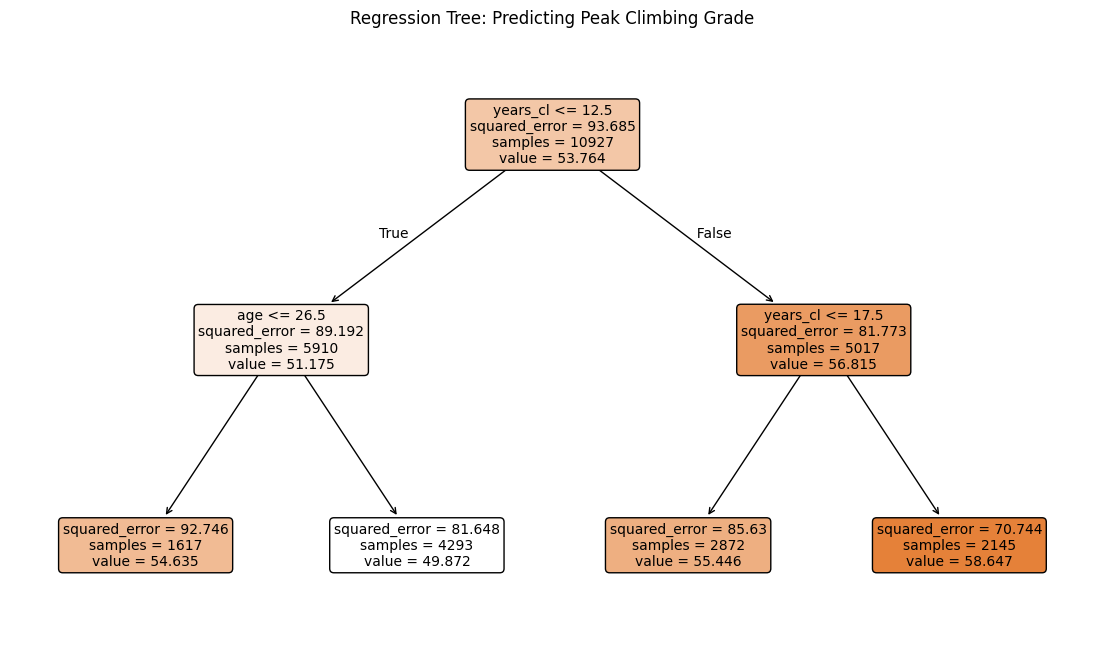

In [ ]:
# Visualize the tree
plt.figure(figsize=(14, 8))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Regression Tree: Predicting Peak Climbing Grade")
plt.show()

Lets go through each level and understand what it means for the prediction. 

The first split is on `years_cl ≤ 12.5`. This means the tree separates climbers with less than or equal to 12.5 years of experience from those with more than 12.5 years.

- If a climber has `12.5 years or less` of climbing experience → go left
    - If `age ≤ 26.5` → go left
        - Climbers with less than or equal to 12.5 years of experience and aged less or equal to 26.5 reach a higher average peak(54.6). 
    - If `age > 26.5` → go right
        - Climbers with less than or equal to 12.5 years of experience and aged higher than 26.5 years tend to reach a lower peak grade(49.9)


- If a climber has `more than 12.5 years` of experience → go right
    - `12.5 < years_cl ≤ 17.5` → go left
        - Climbers with more than 12.5 but less than 17.5 years of experience tend to hit around 55.4 peak grade. 
    - `years_cl > 17.5` → go right
        - Climbers with more than 17.5 years of experience have the highest average peak grade (58.647). 




### Conclusion
In this module, students explored how to use regression trees to model and predict peak climbing performance using real-world climbing data. By building and visualizing decision tree models, students practiced key data science skills such as:
1. Selecting relevant predictor variables like age, experience, and physical characteristics
2. Preprocessing categorical data using dummy variables
3. Training and interpreting regression tree models using scikit-learn
4. Visualizing model splits to understand how the algorithm makes predictions

### Activity ###

1. Predict `grades_max` by creating a regression tree with `weight` and `height` as predictors.

2. Interpret the results. 

3. Add another predictor of your choice, change the `max_depth` from 2 to 4. How does the structure of the tree change?